        Location      Type     Category               Description  Price  \
0     El Manar 1  Location  App. 3 pièc  Mignon appartement meubl   1500   
1    El Menzah 9  Location  App. 3 pièc  Magnifique appartement s   1350   
2        Gammart  Location      Maisons   Triplex s4 avec piscine   7500   
3  Marsa Erriadh  Location  App. 4 pièc      Appart s3 samar à la   1250   
4        Gammart  Location       Duplex  Duplex meuble s3 a gamma   4500   

         Date  Rooms  Surface  
0  19/12/2024      2      113  
1  19/12/2024      2      113  
2  19/12/2024      4      159  
3  19/12/2024      3      130  
4  19/12/2024      3      197  


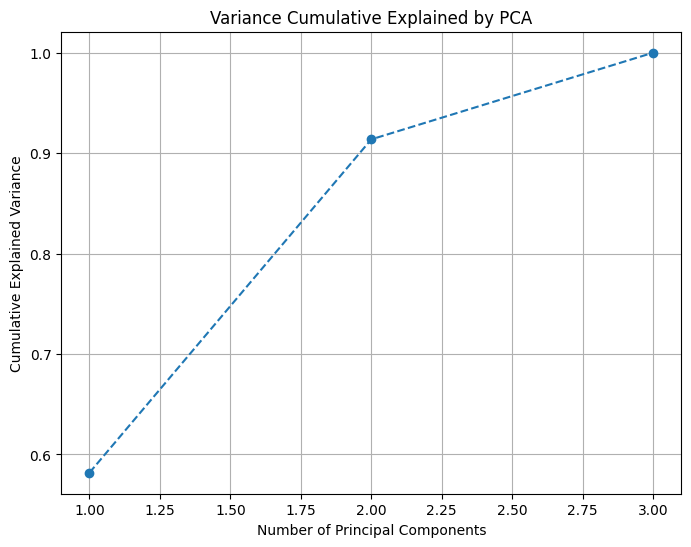

Optimal Number of Components: 3


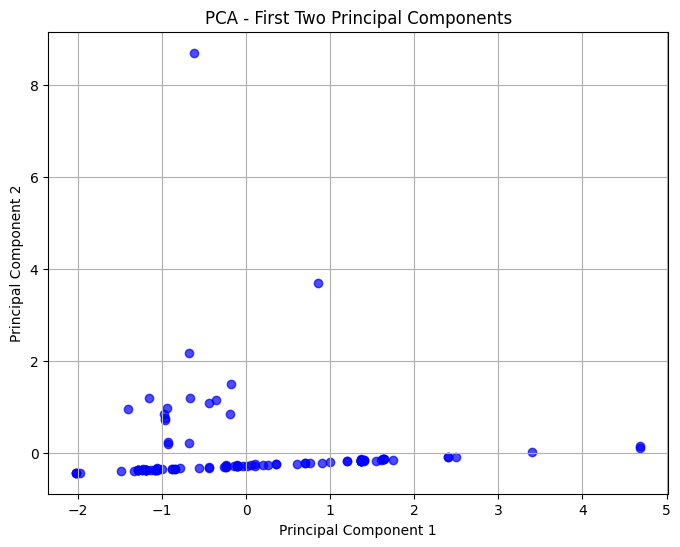

PCA-transformed data saved to PCA_transformed_data.csv


In [3]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
file_path = "Clean_data.csv"  # Path to your cleaned CSV file
data = pd.read_csv(file_path)

# Define a function to clean numeric columns
def clean_numeric_column(column):
    """Convert strings to float after removing spaces and non-numeric characters."""
    # Convert column to string first, then clean and convert to float
    column = column.astype(str).str.replace(' ', '').str.replace(',', '').str.extract(r'(\d+)')[0]
    return pd.to_numeric(column, errors='coerce')

# Clean the 'Price' and 'Surface' columns
data['Price'] = clean_numeric_column(data['Price'])
data['Surface'] = clean_numeric_column(data['Surface'])

# Drop rows with null values in critical columns
data = data.dropna(subset=['Price', 'Surface', 'Rooms']).reset_index(drop=True)

# Verify the cleaned data
print(data.head())

# Drop rows with null values in critical columns
data = data.dropna(subset=['Price', 'Surface', 'Rooms']).reset_index(drop=True)

# Select numerical features for PCA
numerical_features = ['Price', 'Surface', 'Rooms']
X = data[numerical_features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot Cumulative Explained Variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Variance Cumulative Explained by PCA')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Choose the optimal number of components (e.g., 95% variance)
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Optimal Number of Components: {optimal_components}")

# Fit PCA with the optimal number of components
pca_optimal = PCA(n_components=optimal_components)
X_pca_optimal = pca_optimal.fit_transform(X_scaled)

# Visualize the data in the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_optimal[:, 0], X_pca_optimal[:, 1], alpha=0.7, c='blue')
plt.title('PCA - First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

# Add PCA components back to the DataFrame (optional)
for i in range(optimal_components):
    data[f'PC{i+1}'] = X_pca_optimal[:, i]

# Save the transformed data to a new CSV file
data.to_csv("PCA_transformed_data.csv", index=False)
print("PCA-transformed data saved to PCA_transformed_data.csv")
